In [ ]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Wholesale_customers_data.csv")
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df=df.drop(["Channel","Region"],axis=1)

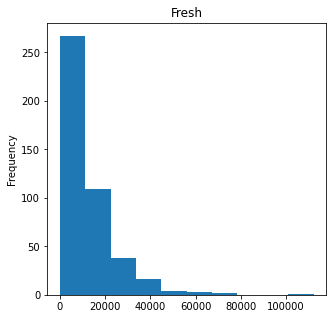

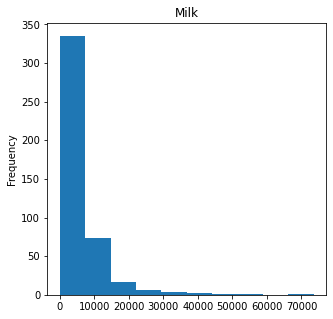

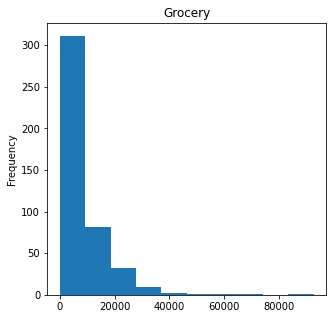

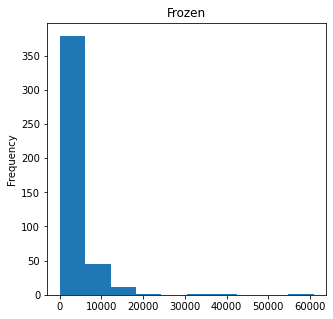

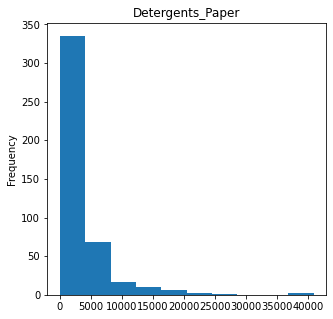

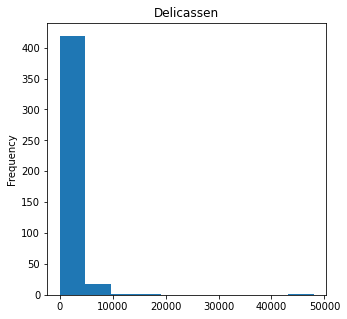

In [ ]:
for col in df:
  plt.figure(col,figsize=(5,5))
  plt.title(col)
  df[col].plot(kind="hist")

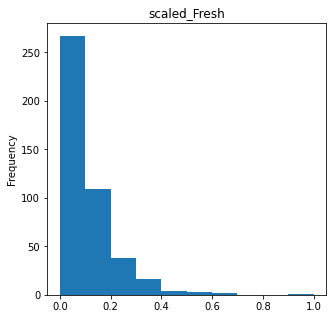

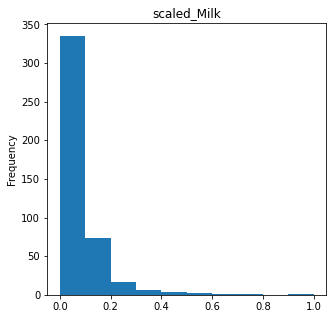

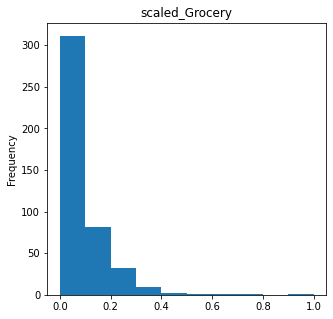

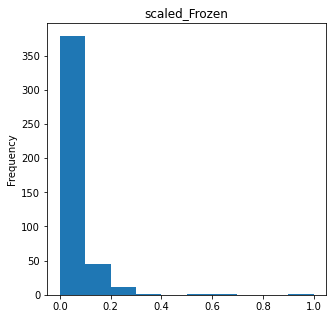

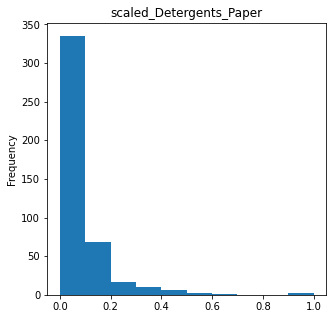

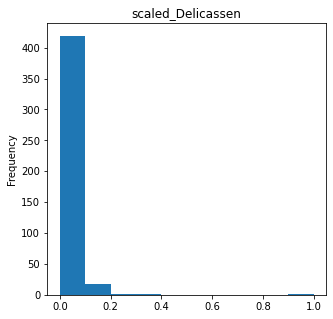

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for var in ["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper",	"Delicassen"]:
  scaled_var="scaled_"+var
  model = scaler.fit(df[var].values.reshape(-1,1))
  df[scaled_var] = model.transform(df[var].values.reshape(-1,1))
  plt.figure(figsize=(5,5))
  plt.title(scaled_var)
  df[scaled_var].plot(kind="hist")


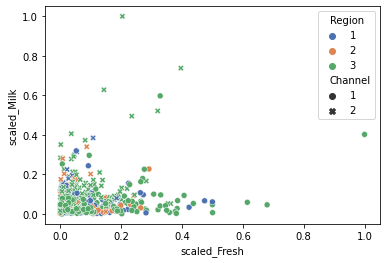

In [ ]:
sns.scatterplot(data=df, x="scaled_Fresh", y="scaled_Milk", hue="Region",style= "Channel",palette="deep")

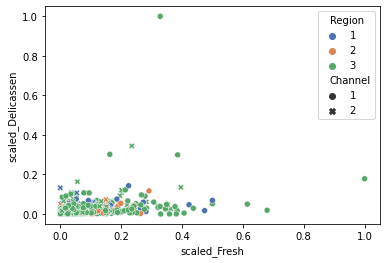

In [ ]:
sns.scatterplot(data=df, x="scaled_Fresh", y="scaled_Delicassen",hue="Region",style= "Channel",palette="deep")

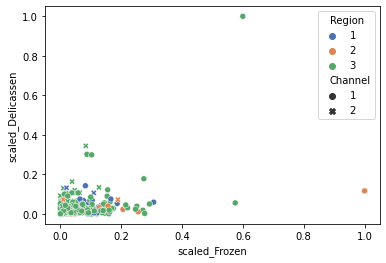

In [ ]:
sns.scatterplot(data=df, x="scaled_Frozen", y="scaled_Delicassen",hue="Region",style= "Channel",palette="deep")

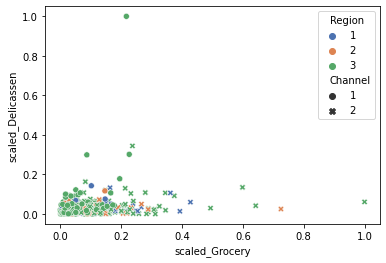

In [ ]:
sns.scatterplot(data=df, x="scaled_Grocery", y="scaled_Delicassen",hue="Region",style= "Channel",palette="deep")

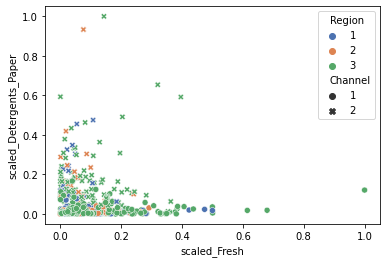

In [ ]:
sns.scatterplot(data=df, x="scaled_Fresh", y="scaled_Detergents_Paper",hue="Region",style= "Channel",palette="deep")

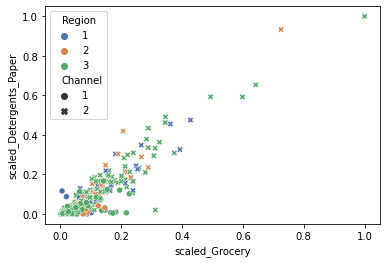

In [ ]:
sns.scatterplot(data=df, x="scaled_Grocery", y="scaled_Detergents_Paper",hue="Region",style= "Channel",palette="deep")

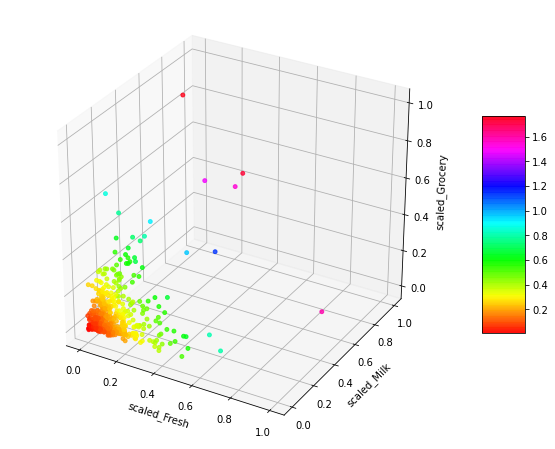

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
my_cmap = plt.get_cmap('hsv')
axis_list = ["scaled_Fresh",	"scaled_Milk",	"scaled_Grocery"	]
x,y,z= axis_list
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(projection="3d")
sc=ax.scatter(df[x],df[y],df[z], s=60, c = (df[x] + df[y] + df[z]),cmap = my_cmap, alpha=0.8, marker='.')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
fig.colorbar(sc, ax = ax, shrink = 0.5, aspect = 5)

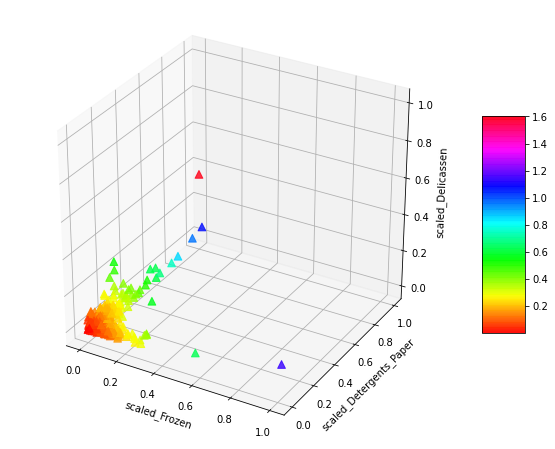

In [ ]:
axis_list = ["scaled_Frozen",	"scaled_Detergents_Paper",	"scaled_Delicassen"	]
x,y,z= axis_list
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(projection="3d")
sc=ax.scatter(df[x],df[y],df[z], s=60, c = (df[x] + df[y] + df[z]),cmap = my_cmap, alpha=0.8, marker='^')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
fig.colorbar(sc, ax = ax, shrink = 0.5, aspect = 5)

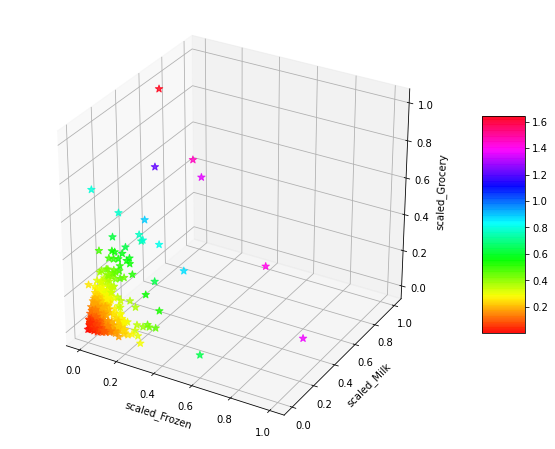

In [ ]:
axis_list = ["scaled_Frozen",	"scaled_Milk",	"scaled_Grocery"	]
x,y,z= axis_list
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(projection="3d")
sc=ax.scatter(df[x],df[y],df[z], s=60, c = (df[x] + df[y] + df[z]),cmap = my_cmap, alpha=0.8, marker='*')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
fig.colorbar(sc, ax = ax, shrink = 0.5, aspect = 5)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(df)
pca_samples = pca.transform(df)
ps = pd.DataFrame(pca_samples)

In [ ]:
print(ps)

                0             1            2            3
0      650.022122   1585.519090   -95.390644  4540.780481
1    -4426.804979   4042.451509  1534.804744  2567.655659
2    -4841.998707   2578.762176  3801.384790  2273.494337
3      990.346437  -6279.805997  1396.959815 -3310.006074
4    10657.998731  -2159.725815   -20.042982   172.715386
..            ...           ...          ...          ...
435  20140.848493   6306.877227  5732.321555 -4339.060117
436  25912.249945 -11757.647107 -3275.758883   524.227268
437   4555.114999  26201.758603 -5887.432919 -2082.906876
438  -2734.370920  -7070.775335  -790.703025  1344.547888
439 -10370.125314  -6161.464909 -1017.142381  1283.657886

[440 rows x 4 columns]


(440, 2)
             1             0
0  1585.519090    650.022122
1  4042.451509  -4426.804979
2  2578.762176  -4841.998707
3 -6279.805997    990.346437
4 -2159.725815  10657.998731


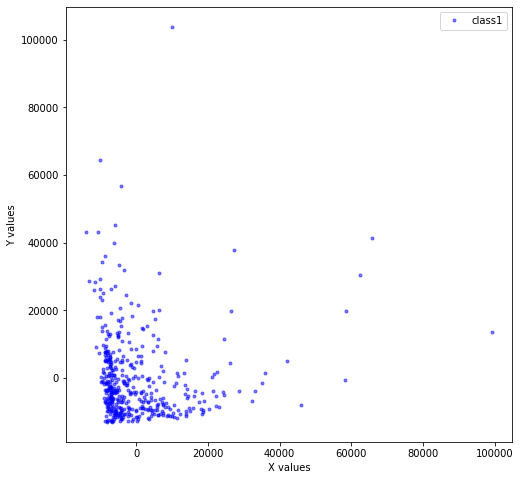

In [ ]:
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[1,0]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[1], tocluster[0], 'o', markersize=3, color='blue', alpha=0.5, label='class1')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

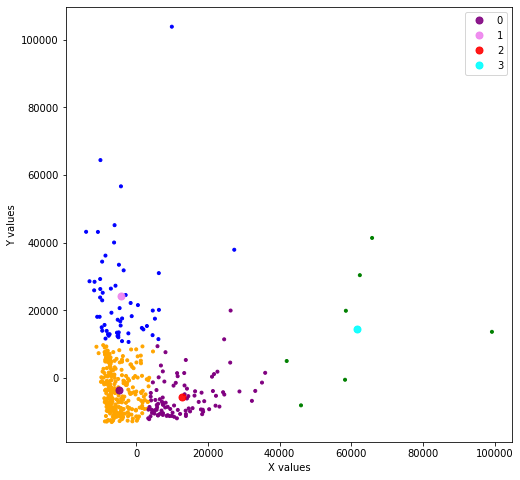

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
center_color = ['purple','violet','red','cyan']
colored = [colors[k] for k in c_preds]

plt.scatter(tocluster[1],tocluster[0],  color = colored, marker='.')
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=7, color=center_color[ci], alpha=0.9, label=''+str(ci))

plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

In [ ]:
score = silhouette_score(tocluster, labels=clusterer.labels_, metric='euclidean')

In [ ]:
score

0.4623571027816981

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

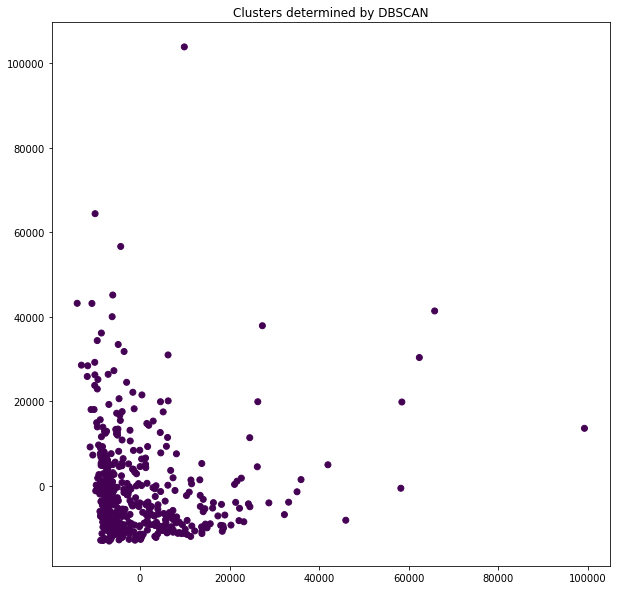

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=100, min_samples=100)
db.fit(tocluster[[1,0]])
y_pred = db.fit_predict(tocluster[[1,0]])
plt.figure(figsize=(10,10))
plt.scatter(tocluster[1], tocluster[0],c=y_pred)
plt.title("Clusters determined by DBSCAN")

In [ ]:
clust_prod = df.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1
5,9413,8259,5126,666,1795,1451,0
6,12126,3199,6975,480,3140,545,0
7,7579,4956,9426,1669,3321,2566,0
8,5963,3648,6192,425,1716,750,0
9,6006,11093,18881,1159,7425,2098,2


In [ ]:
def valuelabel(weight,students):
    for i in range(len(weight)):
        plt.text(i,students[i],students[i], ha = 'center',
                 bbox=dict(facecolor = 'yellow', alpha =0.8))

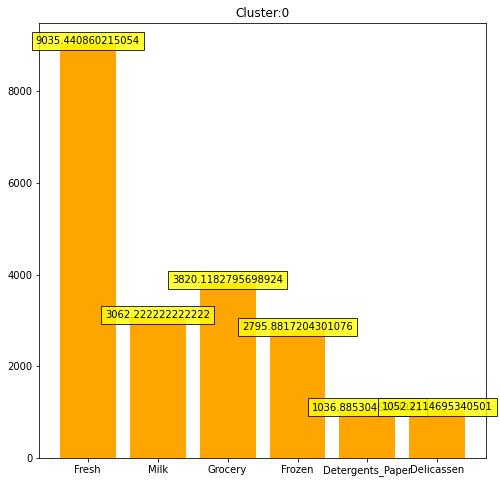

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
labels=['Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
plt.bar(labels,c0,color='orange')
valuelabel(labels,c0)
plt.title('Cluster:0')
plt.show()


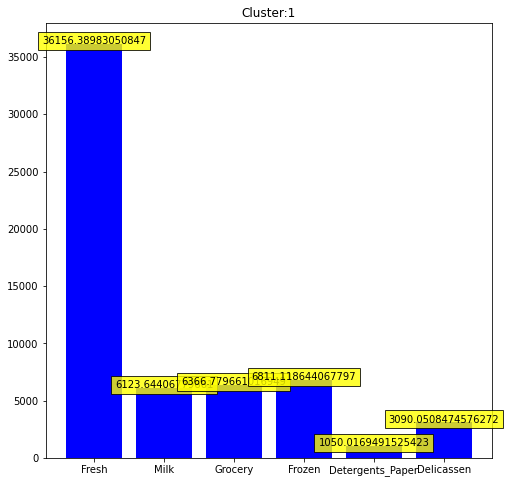

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
labels=['Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
plt.bar(labels,c1,color='blue')
valuelabel(labels,c1)
plt.title('Cluster:1')
plt.show()

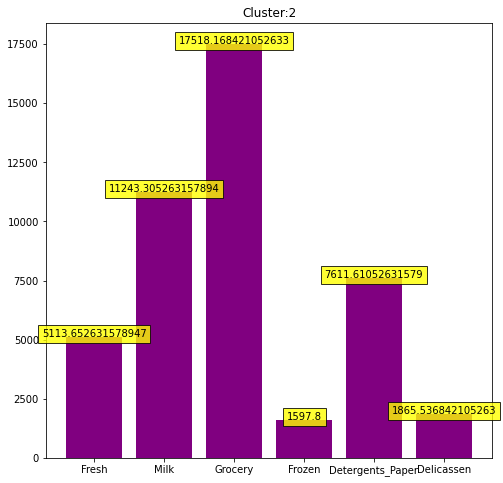

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
labels=['Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
plt.bar(labels,c2,color='purple')
valuelabel(labels,c2)
plt.title('Cluster:2')
plt.show()

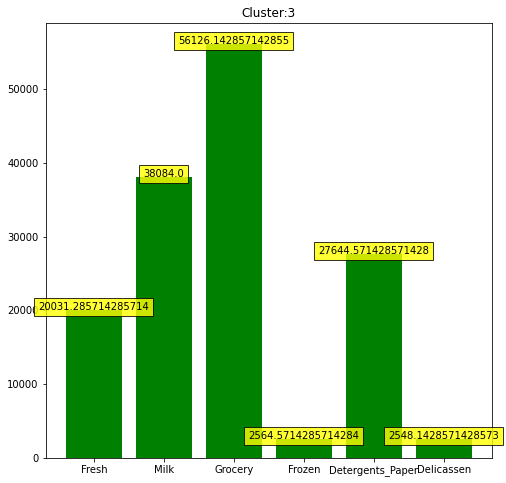

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
labels=['Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
plt.bar(labels,c3,color='green')
valuelabel(labels,c3)
plt.title('Cluster:3')
plt.show()

In [ ]:
c0.sort_values(ascending=False)[0:6]

Fresh               9035.440860
Grocery             3820.118280
Milk                3062.222222
Frozen              2795.881720
Delicassen          1052.211470
Detergents_Paper    1036.885305
dtype: float64

In [ ]:
c1.sort_values(ascending=False)[0:6]

Fresh               36156.389831
Frozen               6811.118644
Grocery              6366.779661
Milk                 6123.644068
Delicassen           3090.050847
Detergents_Paper     1050.016949
dtype: float64

In [ ]:
c2.sort_values(ascending=False)[0:6]

Grocery             17518.168421
Milk                11243.305263
Detergents_Paper     7611.610526
Fresh                5113.652632
Delicassen           1865.536842
Frozen               1597.800000
dtype: float64

In [ ]:
c3.sort_values(ascending=False)[0:6]

Grocery             56126.142857
Milk                38084.000000
Detergents_Paper    27644.571429
Fresh               20031.285714
Frozen               2564.571429
Delicassen           2548.142857
dtype: float64

In [ ]:
cluster_means = [[c0["Fresh"],	c0["Milk"], c0["Grocery"],	c0["Frozen"],	c0["Detergents_Paper"],	c0["Delicassen"]],
                 [c1["Fresh"],	c1["Milk"], c1["Grocery"],	c1["Frozen"],	c1["Detergents_Paper"],	c1["Delicassen"]],
                 [c2["Fresh"],	c2["Milk"], c2["Grocery"],	c2["Frozen"],	c2["Detergents_Paper"],	c2["Delicassen"]],
                 [c3["Fresh"],	c3["Milk"], c3["Grocery"],	c3["Frozen"],	c3["Detergents_Paper"],	c3["Delicassen"]]]

cluster_means = pd.DataFrame(cluster_means, columns = ['Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'])
cluster_means.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9035.440860,3062.222222,3820.118280,2795.881720,1036.885305,1052.211470
1,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847
2,5113.652632,11243.305263,17518.168421,1597.800000,7611.610526,1865.536842
3,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857


In [ ]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
cluster_perc.head(10)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,43.433856,14.720269,18.363517,13.439956,4.984364,5.058038
1,60.667119,10.274915,10.682875,11.428435,1.761833,5.184823
2,11.376294,25.012874,38.972502,3.554610,16.933477,4.150242
3,13.626844,25.907710,38.181384,1.744622,18.805995,1.733446
